In [186]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import csv

In [34]:
# vectors = pd.read_feather('data/1m.ftr')
start = time.time()
vectors = pd.read_csv('data/rust_vectors.csv')
print(f'{time.time()-start:.2f}')
corr = vectors.corr()
vectors.shape

12.78


(5203319, 45)

In [22]:
vectors.isnull().values.any()

False

In [23]:
vectors

,Special Gasoline,Special Diesel,Lubricant,Diesel Auto Clean,Gasoline,Several,Filters,Additives And Fluids,Ethanol,Cigarettes,...,Toys,Covers,Pastas,Popcorn,Sweet Coconut James,Batteries,Mate Herb,Perfumery,Chas Juice Cafe In Powder,Special Diesel S10
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203314,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5203315,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5203316,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5203317,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot Correlation Matrix 

In [24]:
def triangle_map(corrmat):
    fig, ax = plt.subplots(figsize=(12,12))
    df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))
    sns.heatmap(df_lt, cmap='binary', square=True, linewidths=0.2)
    plt.show()

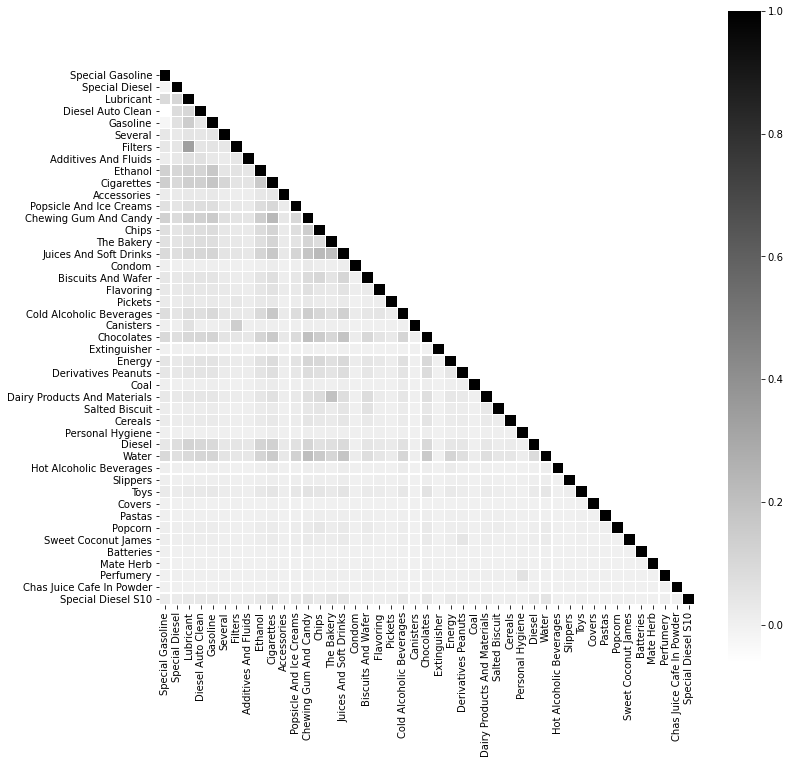

In [25]:
triangle_map(corr)

### Make Graph

### The distance function, i.e.: $\sqrt{2 (1-x)}$
This transforms the edges such that the smaller the edge value, the greater the correlation, therefore allowing us to use an MST to derive the strongest connections.

In [26]:
# Vectorized distance function to transform matrix
def dfunc(cell):
        return np.sqrt(2 * (1 - cell))

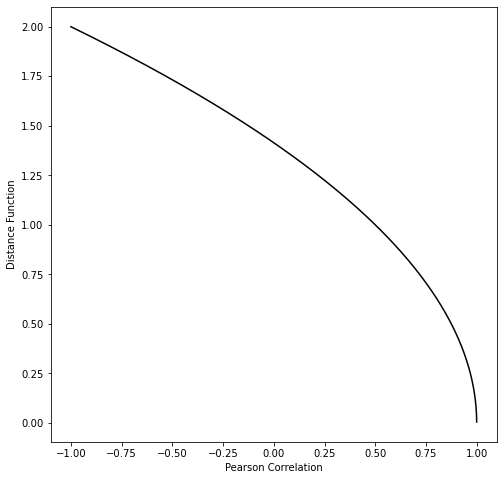

In [95]:
temp = np.arange(-1, 1, 0.00001)
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(temp, dfunc(temp), 'k')
plt.ylabel("Distance Function")
plt.xlabel("Pearson Correlation")
plt.show()

In [147]:
# Draw a graph with the specified parameters
def draw(G, pos, ax, labels, node_color='c', node_size=400, width=1, edge_color='0.25', font_size=15):
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_color, node_size=node_size)
    nx.draw_networkx_edges(G, pos, ax=ax, width=width, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=font_size)

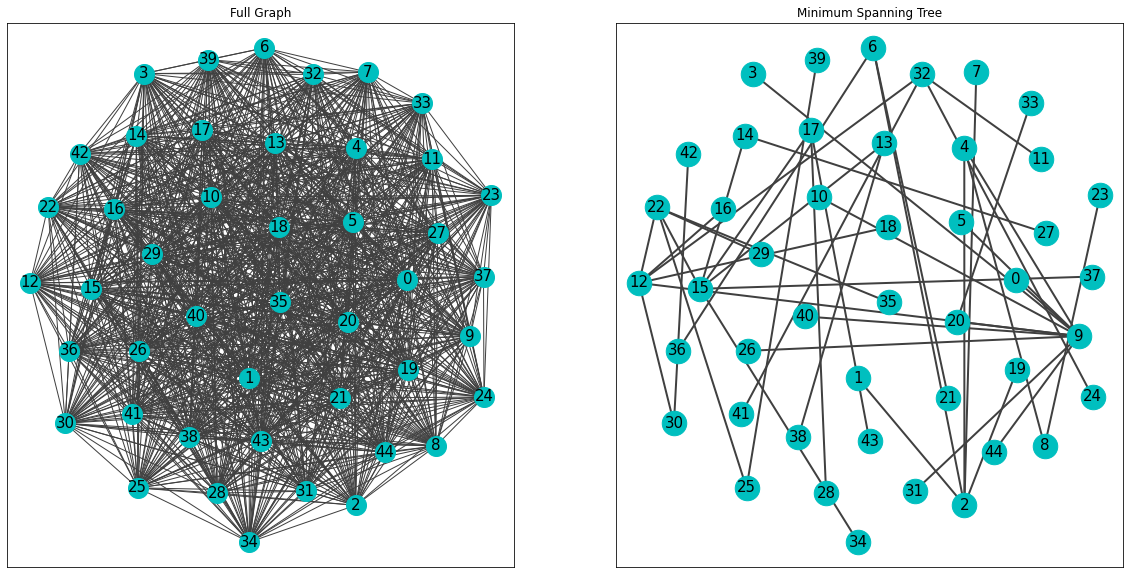

In [184]:
# Global variables
limit = None

# Gen label mapping
cols = vectors.columns[:limit] if limit else vectors.columns
labels = {i:str(i) for i in range(len(cols))}
legend = list(zip(labels, cols))

# Boolean flag to use distance function defined above
use_distance = True
# Make graphs 
corrmat = np.array(vectors.corr())
corrmat = np.absolute(corrmat)
corrmat = dfunc(corrmat) if use_distance else corrmat
corrmat = corrmat[:limit, :limit] if limit else corrmat
G = nx.from_numpy_matrix(corrmat) # Graph
MST = nx.minimum_spanning_tree(G) # Minimum Spanning Tree

# Uniform layout for all plots to follow
pos = nx.spring_layout(G)

# Axes to draw on
nrows, ncols = 1,2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

# Draw full graph
draw(G, pos, ax[0], labels)
ax[0].set_title('Full Graph')

# Draw MST
draw(MST, pos, ax[1], labels, node_size=600, width=2)
ax[1].set_title('Minimum Spanning Tree')

# Show
plt.show()

### Graph Export
Write out in JSON format

In [190]:
cols

Index(['Special Gasoline', 'Special Diesel', 'Lubricant', 'Diesel Auto Clean',
       'Gasoline', 'Several', 'Filters', 'Additives And Fluids', 'Ethanol',
       'Cigarettes', 'Accessories', 'Popsicle And Ice Creams',
       'Chewing Gum And Candy', 'Chips', 'The Bakery',
       'Juices And Soft Drinks', 'Condom', 'Biscuits And Wafer', 'Flavoring',
       'Pickets', 'Cold Alcoholic Beverages', 'Canisters', 'Chocolates',
       'Extinguisher', 'Energy', 'Derivatives Peanuts', 'Coal',
       'Dairy Products And Materials', 'Salted Biscuit', 'Cereals',
       'Personal Hygiene', 'Diesel', 'Water', 'Hot Alcoholic Beverages',
       'Slippers', 'Toys', 'Covers', 'Pastas', 'Popcorn',
       'Sweet Coconut James', 'Batteries', 'Mate Herb', 'Perfumery',
       'Chas Juice Cafe In Powder', 'Special Diesel S10'],
      dtype='object')

In [199]:
# export ordered labels
with open("data/labels.csv","w+") as f:
    wr = csv.writer(f)
    wr.writerow(cols)

In [221]:
# Convert ndarray value to list
temp = pos
for key in temp:
    temp[key] = list(temp[key])
# Export node positional data
with open('data/positional_data.json', 'w+') as f:
    json.dump(temp, f)

In [173]:
# For D3.JS
# Example: https://bl.ocks.org/mbostock/4062045
JSON_graph = nx.node_link_data(MST)

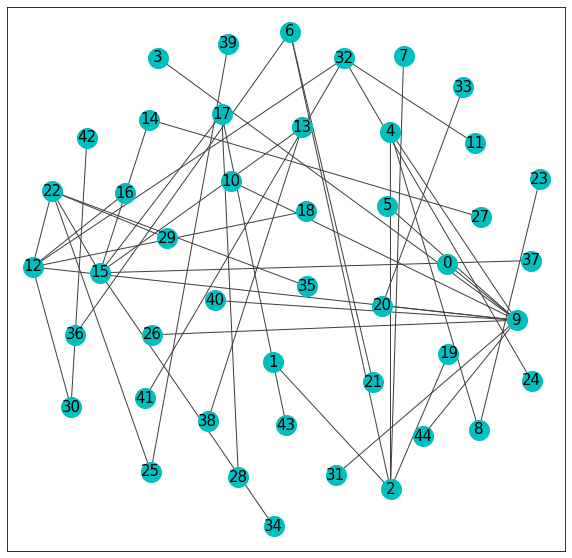

In [239]:
# Example on how to re-import and draw

# Import graph
temp = nx.node_link_graph(JSON_graph)

# Import positional data
temp_pos = json.load(open('data/positional_data.json'))
labels = {}
for key in temp_pos:
    pos[key] = temp_pos[key]
    
# Import label ordering
with open('data/labels.csv') as f:
    for row in csv.reader(f):
        cols = list(row)

# label map
labels = {i:str(i) for i in range(len(cols))}
legend = list(zip(labels, cols))

# Axes to draw on
nrows, ncols = 1,1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

# Draw full graph
draw(temp, pos, ax, labels)

In [183]:
# Sort the edges by shortest values (i.e. closest relations)
E = [(a,b,c['weight']) for (a,b,c) in MST.edges(data=True)]
E = sorted(E, key=lambda x: x[2], reverse=False)

for edge in E:
    print(f'{legend[edge[0]]} -> {legend[edge[1]]}: {edge[2]:.8f}')

(2, 'Lubricant') -> (6, 'Filters'): 1.15329696
(9, 'Cigarettes') -> (12, 'Chewing Gum And Candy'): 1.24075217
(13, 'Chips') -> (15, 'Juices And Soft Drinks'): 1.24559884
(14, 'The Bakery') -> (15, 'Juices And Soft Drinks'): 1.25953533
(12, 'Chewing Gum And Candy') -> (32, 'Water'): 1.26242308
(12, 'Chewing Gum And Candy') -> (22, 'Chocolates'): 1.26710819
(14, 'The Bakery') -> (27, 'Dairy Products And Materials'): 1.27094356
(15, 'Juices And Soft Drinks') -> (22, 'Chocolates'): 1.27845058
(4, 'Gasoline') -> (9, 'Cigarettes'): 1.28525564
(4, 'Gasoline') -> (8, 'Ethanol'): 1.29029897
(9, 'Cigarettes') -> (20, 'Cold Alcoholic Beverages'): 1.29073528
(2, 'Lubricant') -> (4, 'Gasoline'): 1.30731113
(0, 'Special Gasoline') -> (9, 'Cigarettes'): 1.31029521
(6, 'Filters') -> (21, 'Canisters'): 1.31042582
(3, 'Diesel Auto Clean') -> (9, 'Cigarettes'): 1.31432767
(9, 'Cigarettes') -> (31, 'Diesel'): 1.31898343
(11, 'Popsicle And Ice Creams') -> (32, 'Water'): 1.32109270
(24, 'Energy') -> (32, 'W